In [1]:
import numpy as np
import pandas as pd

import averaging_models as am

from rdkit.Chem import AllChem

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.manifold import TSNE
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
C:\Users\kamcl\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kamcl\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kamcl\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kamcl\Miniconda3\lib\site-packages\tensorflow\python\framework\dtype

In [19]:
def score_and_plot(model, X_test, y_test, axs, i):    
    pred = model.predict(X_test)
    score = mean_squared_error(y_test, pred)
    print(score)
    sns.scatterplot(y_test, pred, ax=axs[i]).set_title(name+' - mae: '+str(score)[:5])

In [2]:
# load the data

In [3]:
df1 = pd.read_csv('data/VDR_actives_decoys_ds_1DB1_3KPZ.csv')
df2 = pd.read_csv('data/VDR_molpher_ds_1DB1_3KPZ.csv')
df = pd.concat([df1, df2], axis=0)
print(df.shape)
df.head()

(17540, 12)


,id,smiles,ds_CHEMPLP_1DB1,ds_CHEMPLP_3KPZ,ds_london_1DB1,ds_london_3KPZ,ds_ASE_1DB1,ds_ASE_3KPZ,ds_AHB_1DB1,ds_AHB_3KPZ,ds_AdG_1DB1,ds_AdG_3KPZ
0,CHEMBL466792,O[C@@H]1CC(C[C@@H](O)C1=C)=C\C=C/1\[C@@H]2CC[C...,-141.0760,-19.95060,-17.285406,-17.400385,-41.477875,-39.600536,-107.947450,-117.73358,-9.850554,-8.904275
1,C23259752,S(c1cc(ccc1C)C)c1ccc(NC(=O)CN([C@H](C)c2ccc(S(...,-107.2300,-14.24600,-16.107096,-13.606252,-27.582472,-28.424725,-96.561241,-101.35796,-1.207103,0.146151
2,C20572491,Brc1cc2c(nc(cc2C(=O)N\N=C(\C)/c2ccc(cc2)C(C)(C...,-76.3943,-8.61233,-15.893099,-15.338774,-30.212130,-28.344488,-78.726929,-103.93408,-4.974006,-7.088983
3,CHEMBL2171448,FC(F)(F)C(O)(\C=C\C=C(/CC)\c1cc(OCc2cc(CO)c(cc...,-130.3710,-17.89470,-15.837130,-14.932643,-30.462063,-29.043121,-116.847480,-118.76686,-8.710437,-10.318846
4,CHEMBL226380,FCC=C1[C@H](O)CC(C[C@H]1O)=C\C=C/1\[C@@H]2CC[C...,-138.8000,-19.90610,-15.819595,-16.172329,-39.056965,-37.274292,-113.596890,-131.47810,-8.414309,-10.642583


In [168]:
df1.smiles[0]

'O[C@@H]1CC(C[C@@H](O)C1=C)=C\\C=C/1\\[C@@H]2CC[C@H]([C@H](\\C=C\\C[C@@H](O)C34CC5CC(C3)CC(C4)C5)C)[C@]2(CCC\\1)C'

In [4]:
mols = [AllChem.MolFromSmiles(m) for m in df.smiles]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols]

In [5]:
pca = PCA(0.9)
pca.fit(fps)
fps_pca = pca.transform(fps)

In [6]:
cols = df.columns
names_3KPZ = ['ds_CHEMPLP_3KPZ',
        'ds_london_3KPZ',  'ds_ASE_3KPZ',
        'ds_AHB_3KPZ', 'ds_AdG_3KPZ']
names_1DB1 = ['ds_CHEMPLP_1DB1',
        'ds_london_1DB1',  'ds_ASE_1DB1',
        'ds_AHB_1DB1', 'ds_AdG_1DB1']
names = cols[2:]

In [7]:
a = df.id.str[:3]
label =  np.where(a == 'CHE', 0, np.where(a == 'VDR', 1, 2))

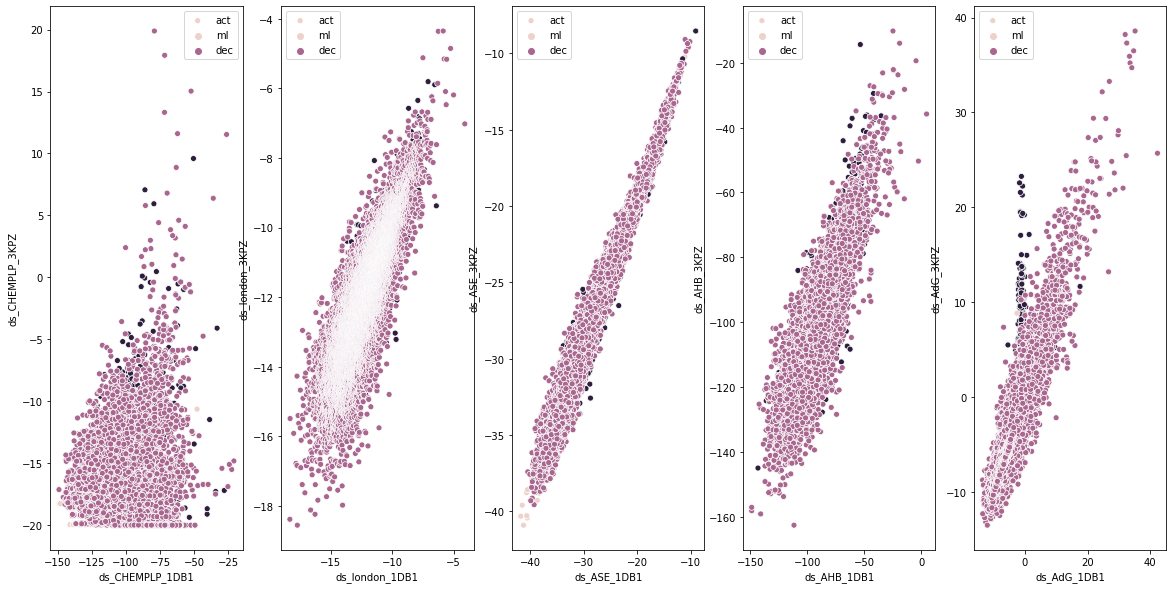

In [8]:
fig, axs = plt.subplots(ncols=5,figsize=(20, 10))
plt.subplots_adjust(wspace = 0.2)

for i in range(5):    
    plot = sns.scatterplot(df[names_1DB1[i]], df[names_3KPZ[i]], ax=axs[i], hue=label)
    plot.legend(['act', 'ml', 'dec'])

#handles, lab = axs[i].get_legend_handles_labels()
#fig.legend(handles, lab, loc='upper center')    
plt.show()

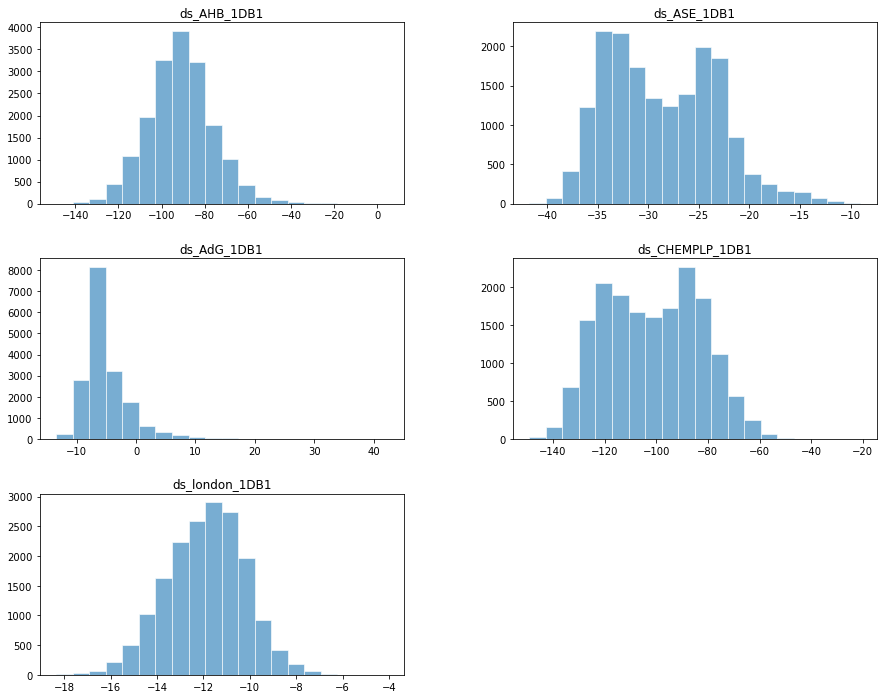

In [9]:
g = df.hist(bins=20, figsize=(15,12), grid=False, edgecolor='white', alpha=0.6, column=names_1DB1)

In [10]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import RidgeCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import power_transform

from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [11]:
scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[names] = scaler.fit_transform(df[names])
df_transformed = df_scaled.copy()
df_transformed[names] = df_transformed[names] + 0.001
df_transformed[names] = power_transform(df_transformed[names], method='box-cox')

x = np.array(fps_pca) #reshape(-1,1)

In [12]:
estimators = [
     ('rfr01', RandomForestRegressor(max_depth=10, random_state=0)),
#     ('svr02', LinearSVR(random_state=0)),
#     ('lrl03', LinearRegression()),
     ('svr04', SVR())]

stack_reg = StackingRegressor(
     estimators=estimators,
     final_estimator=MLPRegressor(random_state=0, max_iter=5000, hidden_layer_sizes=(500, 250, 50)))


In [16]:
averaged_models = am.AveragingModels(models = (am.ENet, am.GBoost, am.KRR, am.ML))
stacked_averaged_models = am.StackingAveragedModels(base_models = (am.ENet, am.GBoost, am.RF), meta_model=am.ML)

KeyboardInterrupt: 

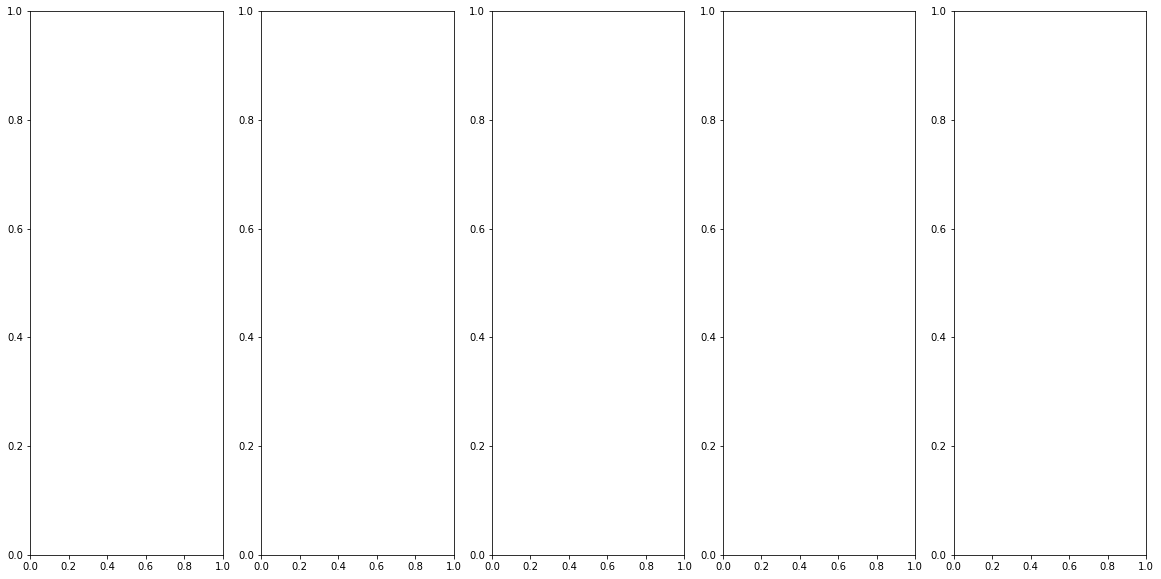

In [79]:
fig, axs = plt.subplots(ncols=5,figsize=(20, 10))
plt.subplots_adjust(wspace = 0.2)

for i, name in enumerate(names_1DB1):
    y = np.array(df_transformed[name])#reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                        random_state=1,
                                                       stratify=label)

    model = stacked_averaged_models.fit(X_train, y_train)
    
    score_and_plot(model, X_test, y_test, axs, i)

In [112]:
from sklearn.model_selection import train_test_split

df_transformed['x'] = [np.array(item) for item in list(x)]
train, test = train_test_split(df_transformed, random_state=1, stratify=label)
    
X_train = train['x'].tolist() 
X_test =  test['x'].tolist() 

C:\Users\kamcl\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0.08409046378225515


C:\Users\kamcl\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0.4048256344422657


C:\Users\kamcl\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0.10621680949758815


C:\Users\kamcl\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0.4894912434985866


C:\Users\kamcl\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0.42566134556493385


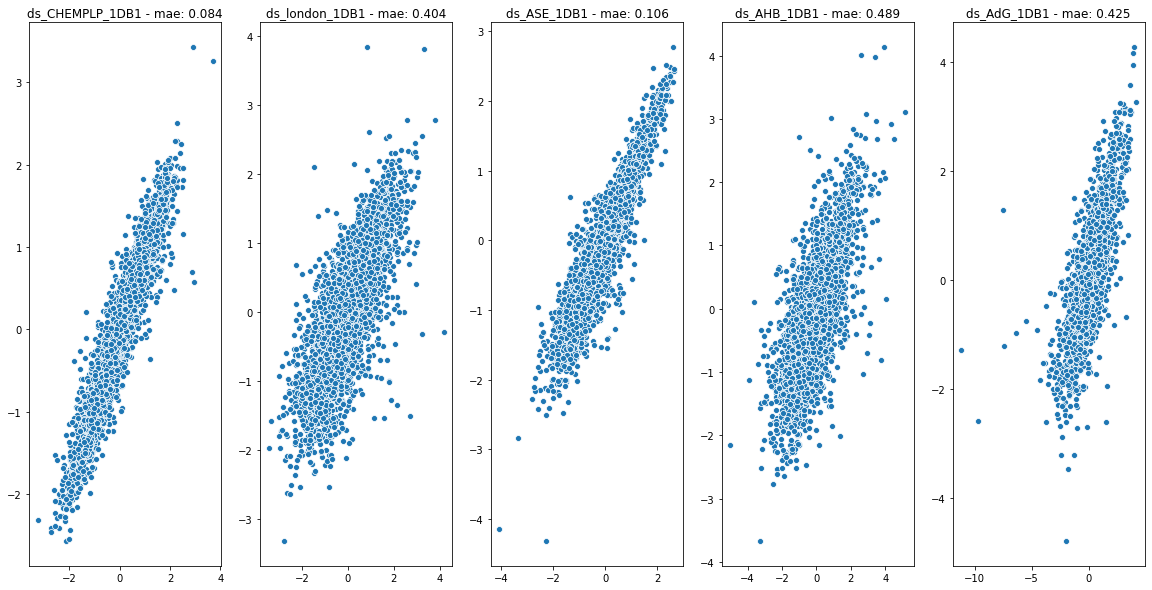

In [113]:
fig, axs = plt.subplots(ncols=5,figsize=(20, 10))
plt.subplots_adjust(wspace = 0.2)
df_pred_1DB1 = test[['id', 'smiles']]

for i, name in enumerate(names_1DB1):

    y_test =  np.array(test[name])
    y_train =  np.array(train[name])
    
    model = MLPRegressor(random_state=0, max_iter=500, hidden_layer_sizes=(500, 250, 50)).fit(X_train, y_train)
    df_pred_1DB1[name] = model.predict(X_test)

    
    score_and_plot(model, X_test, y_test, axs, i)

0.6869422937482924


<AxesSubplot:>

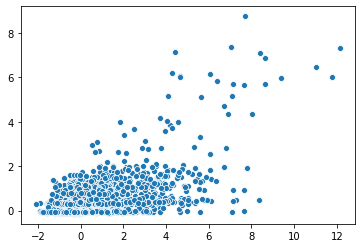

In [70]:
reg = RandomForestRegressor(max_depth=5, random_state=0)
reg.fit(X_train, y_train);

score = model.score(X_test, y_test)
pred = reg.predict(X_test)
print(score)
sns.scatterplot(y_test, pred)

In [18]:
# global ECR

In [166]:
names_3KPZ

['ds_CHEMPLP_3KPZ',
 'ds_london_3KPZ',
 'ds_ASE_3KPZ',
 'ds_AHB_3KPZ',
 'ds_AdG_3KPZ']

In [146]:
categories = 20

df_binned = test[['id', 'smiles']]
for name in names:
    df_binned[name] = pd.cut(test[name], categories, labels=range(1,categories+1))
    
df_binned[names] = df_binned[names].astype(int)

C:\Users\kamcl\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [147]:
df_binned_pred = df_pred_1DB1[['id', 'smiles']]

for name in names_1DB1:
    df_binned_pred[name] = pd.cut(df_pred_1DB1[name], categories, labels=range(1,21))
    
df_binned_pred[names_1DB1] = df_binned_pred[names_1DB1].astype(int)

C:\Users\kamcl\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [187]:
categories = 5
df_binned_aaa = df_pred_1DB1[['id', 'smiles']]

for name in names_1DB1:
    df_binned_aaa[name] = pd.cut(df_pred_1DB1[name], categories)
    


C:\Users\kamcl\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [195]:

for index, row in df_pred_1DB1[:10].iterrows():
    temp = 0
    counter = 0
    for name in names_1DB1:
        counter += 1
        bool_interval = (df_binned_aaa[name].cat.categories.contains(row[name]))
        temp += (np.where(bool_interval)[0]+1)
        if counter == 5:
            cats.append(temp/5)
            

[False  True False False False]
[2]
[False  True False False False]
[2]
[False  True False False False]
[2]
[ True False False False False]
[1]
[ True False False False False]
[1]
[False False  True False False]
[3]
[False  True False False False]
[2]
[False False  True False False]
[3]
[False  True False False False]
[2]
[False False  True False False]
[3]


In [181]:
df_binned_aaa.ds_CHEMPLP_1DB1.cat.categories.contains(0.2)

AttributeError: 'RangeIndex' object has no attribute 'contains'

In [158]:
cat_1db1 = []
cat_1db1_pred = []
cat_3kpz = []
for i in range(df_binned.shape[0]):
    cat_1db1.append(np.sum(df_binned[names_1DB1].iloc[i])/5)
    cat_1db1_pred.append(np.sum(df_binned_pred[names_1DB1].iloc[i])/5)
    cat_3kpz.append(np.sum(df_binned[names_3KPZ].iloc[i])/5)
    

df_binned['cat_1db1'] = cat_1db1
df_binned['cat_3kpz'] = cat_3kpz
df_binned_pred['cat_1db1_pred'] = cat_1db1_pred
#ECR_n = np.exp(-rank1)/10+np.exp(-rank2)/10+np.exp(-rank3)/10+np.exp(-rank4)/10+np.exp(-rank5)/10
#list_ranks.append(ECR_n)

Text(0.5, 1.0, '1DB1 categories')

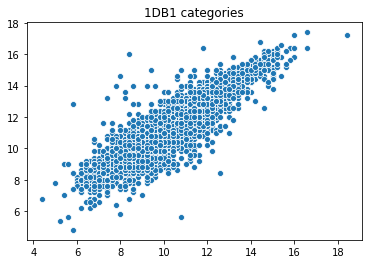

In [157]:
sns.scatterplot(cat_1db1_pred, cat_1db1).set_title('1DB1 categories')

In [162]:
df_binned = df_binned.sort_values(by='cat_1db1', ascending=True)
df_binned_pred = df_binned_pred.sort_values(by='cat_1db1_pred', ascending=True)

In [163]:
df_binned

,id,smiles,ds_CHEMPLP_1DB1,ds_CHEMPLP_3KPZ,ds_london_1DB1,ds_london_3KPZ,ds_ASE_1DB1,ds_ASE_3KPZ,ds_AHB_1DB1,ds_AHB_3KPZ,ds_AdG_1DB1,ds_AdG_3KPZ,cat_1db1,cat_3kpz
160,VDRML6887,FC(F)(F)C(O)(C=CC=C(CCC)c1cc(ccc1)CCc1cc(CO)c(...,3,8,4,5,10,10,6,9,1,9,4.8,8.2
0,CHEMBL466792,O[C@@H]1CC(C[C@@H](O)C1=C)=C\C=C/1\[C@@H]2CC[C...,3,1,2,1,1,1,8,8,13,9,5.4,4.0
193,VDRML6732,FC(O)(C(C)C)COc1ccc(cc1C)C(CC)(CC)c1cc(C)c(OC(...,6,7,4,3,5,3,4,2,9,5,5.6,4.0
184,VDRML2184,FC(F)(F)C(O)(C(O)CC(C(CC)c1cc(ccc1)CCc1cc(CO)c...,3,10,4,2,10,9,6,7,5,5,5.6,6.6
441,VDRML697,FC(F)(F)C(O)(C(CC=C(CC)c1cc(ccc1)CCc1cc(CO)c(c...,3,9,4,6,11,10,4,5,7,6,5.8,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15478,VDRML4938,ClC=1C(=O)C=1C=CCl,16,11,17,17,20,20,14,17,16,13,16.6,15.6
15395,VDRML21704,N(C)(C)c1ccc(N=Cc2ccc(cc2)C=Nc2ccc(cc2)C)cc1,15,9,16,15,17,16,18,16,18,17,16.8,14.6
15491,VDRML4937,ClC=1C(=O)C=1C=C,17,11,18,17,20,20,15,18,16,13,17.2,15.8
15493,VDRML19747,S(=O)(=O)(Cc1ccc(OC)nc1)c1c2nc3c(nc2n(c1NC(=O)...,18,9,18,13,12,12,18,20,20,19,17.2,14.6


In [164]:
df_binned_pred

,id,smiles,ds_CHEMPLP_1DB1,ds_london_1DB1,ds_ASE_1DB1,ds_AHB_1DB1,ds_AdG_1DB1,cat_1db1_pred
31,VDRML1550,O(CC(O)C(C)(C)C)c1ccc(cc1C)C(CC)(CC)c1ccc(NC(=...,4,1,8,1,8,4.4
999,VDRML7395,FC(O)(C(O)(C)C)COc1ccc(cc1C)C(CC)(CC)c1cc(CO)c...,3,4,8,3,7,5.0
0,CHEMBL466792,O[C@@H]1CC(C[C@@H](O)C1=C)=C\C=C/1\[C@@H]2CC[C...,2,6,1,7,10,5.2
152,VDRML14273,Oc1c2C3C(C4CCC(C(CCCC(O)(C)C)C)C4(CC3)C)Cc2ccc...,6,5,6,6,4,5.4
31,CHEMBL452878,O[C@@H]1CC(C[C@@H](O)C1=C)=C\C=C/1\[C@@H]2CC[C...,2,6,1,8,10,5.4
...,...,...,...,...,...,...,...,...
15491,VDRML4937,ClC=1C(=O)C=1C=C,16,17,20,15,12,16.0
1888,CHEMBL192627,ClC=1C(=O)C(Cl)=C(Cl)C(=O)C=1Cl,16,17,20,15,12,16.0
15243,VDRML19749,S(=O)(=O)(Nc1ccc(OC)nc1)c1c2nc3c(nc2n(c1NC(=O)...,20,14,13,18,18,16.6
15434,VDRML21720,S(=O)(=O)(c1ccccc1O)c1c2cc3c(nc2n(c1NS(=O)(=O)...,17,15,14,18,19,16.6


In [ ]:
reg = RandomForestRegressor(max_depth=5, random_state=0)
reg.fit(X_train, y_train);

score = model.score(X_test, y_test)
pred = reg.predict(X_test)
print(score)
sns.scatterplot(y_test, pred)

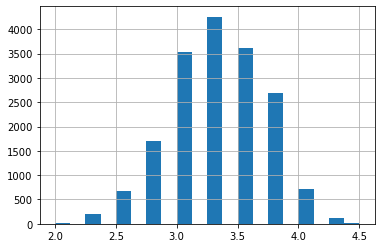

In [74]:
bins_1db1 = pd.cut(df_binned['cat_1db1'], 4, labels=range(1,5))

<AxesSubplot:xlabel='cat_3kpz'>

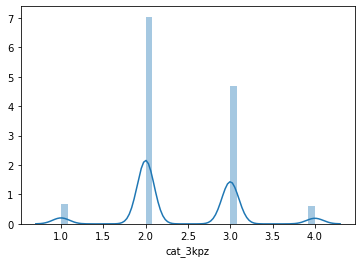

In [75]:
sns.distplot(bins_3kpz)

In [42]:
df1 = pd.read_csv('data/VDR_actives_decoys_just_ECR.csv')
df2 = pd.read_csv('data/VDR_Molpher_just_ECR.csv')
df_ecr = pd.concat([df1, df2], axis=0)
df_ecr['ecr_cat_1db1'] = pd.cut(df_ecr['ECR_1DB1'], 5, labels=range(1,6))
df_ecr['ecr_cat_3kpz'] = pd.cut(df_ecr['ECR_3KPZ'], 5, labels=range(1,6))

(17540, 12)


[0.62175103 0.63337893 0.64476386]


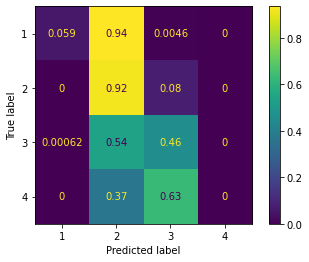

In [76]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

y = np.array(bins_3kpz).ravel()#reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state=1)
   
clf = RandomForestClassifier(max_depth=10, random_state=1).fit(X_train, y_train)
print(cross_val_score(clf, X_test, y_test, cv=3))
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

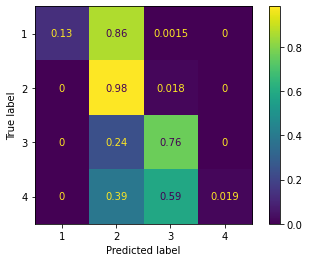

In [77]:
plot_confusion_matrix(clf, X_train, y_train, normalize='true')